In [1]:
import pandas as pd
import numpy as np

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Raisin_Dataset.xlsx to Raisin_Dataset.xlsx


In [7]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [8]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [12]:
input = df[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter']].to_numpy()
target = df["Class"].to_numpy()

In [13]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [26]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_traget, test_target = train_test_split(input, target, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [28]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(train_scaled, train_target)
print(lg.score(train_scaled, train_target))

print(lg.score(test_scaled, test_target))

0.8680555555555556
0.8555555555555555


In [30]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [58]:
df1 = pd.read_excel("Raisin_Dataset.xlsx")

In [59]:
df1.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [60]:
cols = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class']

df1 = pd.read_excel("Raisin_Dataset.xlsx",header=None, names=cols).dropna()
df1

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
1,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.04,Kecimen
2,75166,406.690687,243.032436,0.801805,78789,0.68413,1121.786,Kecimen
3,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
4,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
...,...,...,...,...,...,...,...,...
896,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
897,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
898,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
899,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [61]:
df1['Class'].value_counts()

,count
Class,
Kecimen,450
Besni,450
Class,1


Text(0.5, 1.0, 'Class')

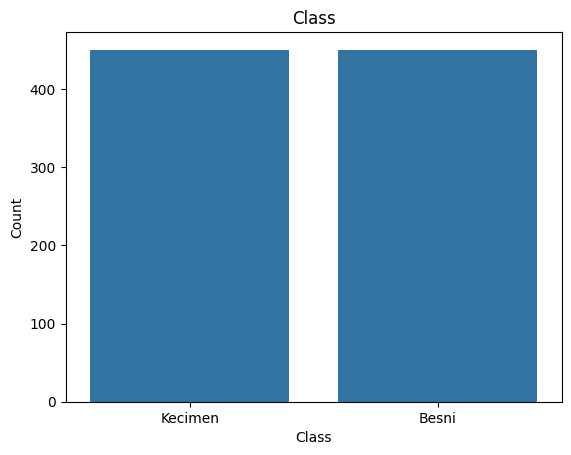

In [62]:
# 레이블 갯수 확인

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class")

In [63]:
#결측치 확인하기
df1.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


In [64]:
#결측치를 제거하는 과정
df1 = df.dropna()
df1.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


In [65]:
# 모든 레이블을 숫자로 변형 -> 머신러닝은 문자로 된 데이터는 읽지 못한다.

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df1.columns:
    label_encoders[column] = LabelEncoder()
    df1[column] = label_encoders[column].fit_transform(df1[column])

In [66]:
#모든 레이블이 숫자로 변형되었음을 확인
df1

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1
...,...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461,0
896,549,546,540,508,549,99,577,0
897,640,517,739,174,650,722,656,0
898,600,633,506,683,600,177,622,0


In [67]:
#Class를 제외하고 나머지 컬럼들을 선택
input = df1.drop(columns=["Class"])

#Class만 선택
target = df1["Class"]

In [68]:
input

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,551,553,500,558,542,811,544
1,404,446,409,469,413,299,453
2,583,554,581,448,571,102,573
3,74,54,159,108,68,394,66
4,462,254,709,33,445,890,382
...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461
896,549,546,540,508,549,99,577
897,640,517,739,174,650,722,656
898,600,633,506,683,600,177,622


In [69]:
target

,Class
0,1
1,1
2,1
3,1
4,1
...,...
895,0
896,0
897,0
898,0


In [70]:
train_input, test_input, train_target, test_target = train_test_split(input, target, test_size=0.2, stratify=target, random_state=42)

In [71]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((720, 7), (180, 7), (720,), (180,))

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#의사결정 나무 모델 생성
dt = DecisionTreeClassifier(random_state=42)
#랜덤 포레스트 모델 생성
rf = RandomForestClassifier(n_estimators=200, random_state=42)
#로지스틱 회귀 모델 생성
lr = LogisticRegression(max_iter=500)

In [73]:
#모델 학습 시키기
dt.fit(train_input, train_target)
rf.fit(train_input, train_target)
lr.fit(train_input, train_target)

LogisticRegression(max_iter=500)

In [76]:
#모델 예측 결과 생성

dt_pred = dt.predict(test_input)
rf_pred = rf.predict(test_input)
lr_pred = lr.predict(test_input)

In [77]:
#예측값 출력

print(dt_pred)
print(rf_pred)
print(lr_pred)

[1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1
 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1
 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1]
[1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1
 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1
 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1]
[0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1
 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(test_target, dt_pred)
rf_acc = accuracy_score(test_target, rf_pred )
lr_acc = accuracy_score(test_target, lr_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(test_target,dt_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(test_target,rf_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(test_target,lr_pred))

=== DT Test Accuracy ===
Decision Tree : 0.8444
[[71 19]
 [ 9 81]]
=== RF Test Accuracy ===
Random Forest : 0.8722
[[72 18]
 [ 5 85]]
=== LR Test Accuracy ===
Logistic Reg. : 0.8944
[[76 14]
 [ 5 85]]
